# 1. Import and Install Dependencies

In [57]:
!pip3 install tensorflow==2.18.0 opencv-python mediapipe scikit-learn matplotlib


In [58]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp1

# 2. Keypoints using MP Holistic

In [59]:
mp1_holistic = mp1.solutions.holistic # Holistic model
mp1_drawing = mp1.solutions.drawing_utils # Drawing utilities

In [60]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    result = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, result

In [61]:
import mediapipe as mp1

# Initialize Mediapipe components
mp1_drawing = mp1.solutions.drawing_utils
mp1_holistic = mp1.solutions.holistic
mp1_face_mesh = mp1.solutions.face_mesh

def draw_landmarks(image, results):
    # Draw face connections using face_mesh constants
    if results.face_landmarks:
        mp1_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp1_face_mesh.FACEMESH_TESSELATION,  # Use FACEMESH_TESSELATION or FACEMESH_CONTOURS
            mp1_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp1_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1),
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp1_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp1_holistic.POSE_CONNECTIONS,
            mp1_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp1_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2),
        )
    
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp1_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp1_holistic.HAND_CONNECTIONS,
            mp1_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp1_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2),
        )
    
    # Draw right hand connections
    if results.right_hand_landmarks:
        mp1_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp1_holistic.HAND_CONNECTIONS,
            mp1_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp1_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2),
        )

In [62]:
def draw_styled_landmarks(image, results):
    # Import necessary modules
    import mediapipe as mp1

    # Initialize drawing and holistic modules
    mp1_drawing = mp1.solutions.drawing_utils
    mp1_holistic = mp1.solutions.holistic
    mp1_face_mesh = mp1.solutions.face_mesh

    # Draw face connections (use face_mesh for FACE_CONNECTIONS)
    mp1_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp1_face_mesh.FACEMESH_TESSELATION,  # Correct attribute
        mp1_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp1_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1),
    )

    # Draw pose connections
    mp1_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp1_holistic.POSE_CONNECTIONS,
        mp1_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp1_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2),
    )

    # Draw left hand connections
    mp1_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp1_holistic.HAND_CONNECTIONS,
        mp1_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp1_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2),
    )

    # Draw right hand connections
    mp1_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp1_holistic.HAND_CONNECTIONS,
        mp1_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp1_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2),
    )

In [63]:
cap1 = cv2.VideoCapture(0)
# Set mediapipe model 
with mp1_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap1.isOpened():

        # Read feed
        ret, frame = cap1.read()

        # Make detections
        image, result1 = mediapipe_detection(frame, holistic)
        print(result1)
        
        # Draw landmarks
        draw_styled_landmarks(image, result1)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap1.release()
    cv2.destroyAllWindows()

I0000 00:00:1734320496.598905 2975207 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1734320496.753427 3058453 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320496.779844 3058453 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320496.784562 3058456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320496.785668 3058457 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320496.785876 3058451 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [64]:
draw_landmarks(frame, result1)

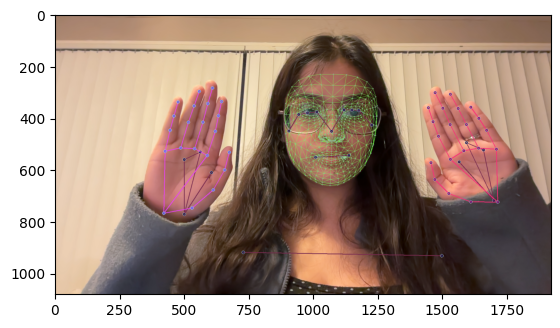

In [65]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [66]:
len(result1.left_hand_landmarks.landmark)

21

In [67]:
pose = []
for res in result1.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [68]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result1.pose_landmarks.landmark]).flatten() if result1.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in result1.face_landmarks.landmark]).flatten() if result1.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in result1.left_hand_landmarks.landmark]).flatten() if result1.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in result1.right_hand_landmarks.landmark]).flatten() if result1.right_hand_landmarks else np.zeros(21*3)

In [69]:
face = np.array([[res.x, res.y, res.z] for res in result1.face_landmarks.landmark]).flatten() 
if result1.face_landmarks:
    face 
else:
    np.zeros(1404)

In [70]:
def normalize_keypoints(keypoints):
    # Reshape the keypoints array into a 2D array of (num_landmarks, 3)
    keypoints_reshape = keypoints.reshape(-1, 3)  # Assuming keypoints contain (x, y, z)
    
    # Use the first keypoint (e.g., nose) as the reference point
    ref_p = keypoints_reshape[0]
    
    # Subtract the reference point from all keypoints
    normalized = keypoints_reshape - ref_p
    
    # Normalize by the Euclidean distance of the reference point to ensure scaling
    scale = np.linalg.norm(ref_p) if np.linalg.norm(ref_p) != 0 else 1
    normalized /= scale
    
    # Flatten back to the original 1D structure
    return normalized.flatten()

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result1.pose_landmarks.landmark]).flatten() if result1.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in result1.face_landmarks.landmark]).flatten() if result1.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in result1.left_hand_landmarks.landmark]).flatten() if result1.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in result1.right_hand_landmarks.landmark]).flatten() if result1.right_hand_landmarks else np.zeros(21*3)
    combined = np.concatenate([pose, face, lh, rh])
    return normalize_keypoints(combined)

In [71]:
result_test = extract_keypoints(res)

In [72]:
result_test

array([ 0.        ,  0.        ,  0.        , ..., -0.26671992,
       -0.08984393,  0.76763287])

In [73]:
np.save('0', result_test)

In [74]:
np.load('0.npy')

array([ 0.        ,  0.        ,  0.        , ..., -0.26671992,
       -0.08984393,  0.76763287])

# 4. Setup Folders for Collection

In [75]:
import os
import numpy as np

# Create a dynamic folder path pointing to the Downloads directory
BASE_PATH = os.path.expanduser("~/Downloads")  # Use the Downloads directory as the base path
DATA_PATH = os.path.join(BASE_PATH, 'MP_Data')  # Append the folder name

# Check if the folder exists, if not, create it
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    print(f"Folder created at: {DATA_PATH}")
else:
    print(f"Folder already exists at: {DATA_PATH}")

# Actions that we try to detect
actions = np.array(['hello', 'goodbye', 'please', 'thankyou', 'yes', 'no'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30
start_folder = 0


Folder already exists at: /Users/ritwikadas/Downloads/MP_Data


In [76]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [77]:
cap1 = cv2.VideoCapture(0)

# Set Mediapipe model
with mp1_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences (videos)
        for sequence in range(start_folder, start_folder + no_sequences):
            # Loop through video length (sequence length)
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap1.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Display start collection message for the first frame
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                
                # Ensure the directory exists
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                
                # Save the keypoints
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap1.release()
    cv2.destroyAllWindows()


I0000 00:00:1734320563.793889 2975207 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1734320563.910747 3059520 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320563.928135 3059520 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320563.934034 3059519 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320563.934365 3059525 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734320563.934669 3059523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

In [78]:
cap1.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [80]:
label_map = {label:num for num, label in enumerate(actions)}

In [81]:
label_map

{'hello': 0, 'goodbye': 1, 'please': 2, 'thankyou': 3, 'yes': 4, 'no': 5}

In [82]:
sequences, labels = [], []
for action in actions:
    # Get only numeric folder names
    sequence_dirs = [d for d in os.listdir(os.path.join(DATA_PATH, action)) if d.isdigit()]
    for sequence in np.array(sequence_dirs).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [83]:
np.array(sequences).shape

(180, 30, 1662)

In [84]:
np.array(labels).shape

(180,)

In [85]:
X = np.array(sequences)

In [86]:
X.shape

(180, 30, 1662)

In [87]:
y = to_categorical(labels).astype(int)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [89]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [91]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [95]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))  # Change to 1629
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [96]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [97]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - categorical_accuracy: 0.1785 - loss: 2.8015
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.1693 - loss: 2.6439
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1458 - loss: 3.0289
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.1919 - loss: 1.8750
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.1787 - loss: 1.8401
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1648 - loss: 1.8509
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1892 - loss: 1.7790
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.2274 - loss: 1.7383
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.2116 - loss: 1.8099
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.1723 - loss: 1.7738
Epoch 11/2000
6/6 ━━━━━━━━━━━

In [98]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

# 8. Make Predictions

In [99]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [102]:
actions[np.argmax(res[4])]

'hello'

In [103]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [104]:
model.save('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [105]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [106]:
y_hat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [107]:
y_true = np.argmax(y_test, axis=1).tolist()
y_hat = np.argmax(y_hat, axis=1).tolist()

In [108]:
multilabel_confusion_matrix(y_true, y_hat)

array([[[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]]])

In [109]:
accuracy_score(y_true, y_hat)

1.0

# 11. Test in Real Time

In [110]:
from scipy import stats

In [111]:
colors = [
    (245,117,16), (117,245,16), (16,117,245),
    (66, 245, 200), (200, 66, 245), (245, 200, 66)
]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    res = np.squeeze(res)  # Ensure `res` is a 1D array
    for num, prob in enumerate(res):
        prob = float(prob)  # Convert to scalar
        # Draw rectangles for probabilities
        cv2.rectangle(output_frame, (0, 60 + num * 40), 
                      (int(prob * 100), 90 + num * 40), 
                      colors[num], -1)
        # Add text for action labels
        cv2.putText(output_frame, f'{actions[num]}: {prob:.2f}', 
                    (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame



In [112]:
if isinstance(res, np.ndarray):
    res = np.squeeze(res)  # Remove unnecessary dimensions
    print("After squeeze:", res.shape)

After squeeze: (9, 6)


In [115]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap1 = cv2.VideoCapture(0)
# Set mediapipe model
with mp1_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap1.isOpened():
        # Read feed
        ret, frame = cap1.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0].flatten()  # Ensure 1D
            predictions.append(np.argmax(res))

            # Visualization logic
            if len(predictions) >= 10 and len(res) == len(actions):
                if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
                    if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Visualization
                image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap1.release()
cv2.destroyAllWindows()


I0000 00:00:1734322985.412055 2975207 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1734322985.517108 3197212 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734322985.537563 3197214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734322985.541379 3197218 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734322985.541398 3197211 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734322985.541602 3197216 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 